In [ ]:
# Homework 6 Template
# G. Besla & R. Li
# Ben Phan

In [1]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import sys
import os

In [62]:
# Change path to homework3 where the ReadFile.py file is
module_path = r'C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Homeworks\Homework3'

# Add the directory to sys.path
sys.path.append(module_path)

# Import ReadFile
from ReadFile import Read

In [63]:
# Change path to homework4 where the class CenterOfMass file is
module_path = r'C:\Users\kietb\OneDrive\Desktop\Suffering\Undergrad\ASTR400B\Homeworks\Homework4'

# Add the directory to sys.path
sys.path.append(module_path)

# Import CenterOfMass class
from CenterOfMass_v2 import CenterOfMass

In [ ]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy: str
            name of the galaxy, e.g. "MW", "M31", and "M33"
        start: int
            number of the first snapshot to be read in
        end: int
            number of the last snapshot to be read in
        n: int
            intervals in which the COM will be returned

    outputs: 
        fileout: txt file
            "Orbit_galaxyname.txt" file contains the time, x, y, z, vx, vy, vz of the COM of the galaxy at each snapshot 
    """
    
    # Path to the Data files
    path = "C:\\Users\\kietb\\OneDrive\\Desktop\\Suffering\\Undergrad\\ASTR400B\\Homeworks\\Homework6\\Data"

    # compose the filename for output
    fileout = f'Orbit_{galaxy}.txt'

    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    delta = 0.1 # tolerance
    # for M33 that is stripped more, use different values for VolDec
    if galaxy == 'M33':
        volDec = 4.0
    else:
        volDec = 2.0

    # generate the snapshot id sequence 
    snap_ids = np.arange(start, end + 1, n) # end + 1 because arange ends before the end value

    # it is always a good idea to also check if the input is eligible (not required)
    # Code stops if snap_ids is empty
    if len(snap_ids) == 0:
        print('No snapshots available. Please try again.')
        return
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros((len(snap_ids), 7)) # np.zeros need to be a tupple
    
    # a for loop to loop over files 
    for i, snap_id in enumerate(snap_ids):
 
        # compose the data filename (be careful about the folder)
        ilbl = '000' + str(snap_id)
        ilbl = ilbl[-3:] # only takes last 3 digits

        # Construct the filename using defined filepath
        filename = os.path.join(path, galaxy, f"{galaxy}_{ilbl}.txt")
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2) # for disk particle

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        com_pos = COM.COM_P(delta = delta, volDec = volDec)
        com_vel = COM.COM_V(com_pos[0], com_pos[1], com_pos[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i, 0] = (COM.time / 1000).value # covert from Myr to Gyr
        orbit[i, 1] = com_pos[0].value  # x
        orbit[i, 2] = com_pos[1].value  # y
        orbit[i, 3] = com_pos[2].value  # z
        orbit[i, 4] = com_vel[0].value  # vx
        orbit[i, 5] = com_vel[1].value  # vy
        orbit[i, 6] = com_vel[2].value  # vz

        # print snap_id to see the progress
        print(f"Processed snapshot: {snap_id}")
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
    print(f"Successfully saved orbit data to {fileout}")

In [87]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM("MW", 0, 800, 5)

Processed snapshot: 0
Processed snapshot: 5
Processed snapshot: 10
Processed snapshot: 15
Processed snapshot: 20
Processed snapshot: 25
Processed snapshot: 30
Processed snapshot: 35
Processed snapshot: 40
Processed snapshot: 45
Processed snapshot: 50
Processed snapshot: 55
Processed snapshot: 60
Processed snapshot: 65
Processed snapshot: 70
Processed snapshot: 75
Processed snapshot: 80
Processed snapshot: 85
Processed snapshot: 90
Processed snapshot: 95
Processed snapshot: 100
Processed snapshot: 105
Processed snapshot: 110
Processed snapshot: 115
Processed snapshot: 120
Processed snapshot: 125
Processed snapshot: 130
Processed snapshot: 135
Processed snapshot: 140
Processed snapshot: 145
Processed snapshot: 150
Processed snapshot: 155
Processed snapshot: 160
Processed snapshot: 165
Processed snapshot: 170
Processed snapshot: 175
Processed snapshot: 180
Processed snapshot: 185
Processed snapshot: 190
Processed snapshot: 195
Processed snapshot: 200
Processed snapshot: 205
Processed snap

In [85]:
# Do it for M31
OrbitCOM("M31", 0, 800, 5)

Processed snapshot: 0
Processed snapshot: 5
Processed snapshot: 10
Processed snapshot: 15
Processed snapshot: 20
Processed snapshot: 25
Processed snapshot: 30
Processed snapshot: 35
Processed snapshot: 40
Processed snapshot: 45
Processed snapshot: 50
Processed snapshot: 55
Processed snapshot: 60
Processed snapshot: 65
Processed snapshot: 70
Processed snapshot: 75
Processed snapshot: 80
Processed snapshot: 85
Processed snapshot: 90
Processed snapshot: 95
Processed snapshot: 100
Processed snapshot: 105
Processed snapshot: 110
Processed snapshot: 115
Processed snapshot: 120
Processed snapshot: 125
Processed snapshot: 130
Processed snapshot: 135
Processed snapshot: 140
Processed snapshot: 145
Processed snapshot: 150
Processed snapshot: 155
Processed snapshot: 160
Processed snapshot: 165
Processed snapshot: 170
Processed snapshot: 175
Processed snapshot: 180
Processed snapshot: 185
Processed snapshot: 190
Processed snapshot: 195
Processed snapshot: 200
Processed snapshot: 205
Processed snap

In [83]:
# Do it for M33
OrbitCOM("M33", 0, 800, 5)

Processed snapshot: 0
Processed snapshot: 5
Processed snapshot: 10
Processed snapshot: 15
Processed snapshot: 20
Processed snapshot: 25
Processed snapshot: 30
Processed snapshot: 35
Processed snapshot: 40
Processed snapshot: 45
Processed snapshot: 50
Processed snapshot: 55
Processed snapshot: 60
Processed snapshot: 65
Processed snapshot: 70
Processed snapshot: 75
Processed snapshot: 80
Processed snapshot: 85
Processed snapshot: 90
Processed snapshot: 95
Processed snapshot: 100
Processed snapshot: 105
Processed snapshot: 110
Processed snapshot: 115
Processed snapshot: 120
Processed snapshot: 125
Processed snapshot: 130
Processed snapshot: 135
Processed snapshot: 140
Processed snapshot: 145
Processed snapshot: 150
Processed snapshot: 155
Processed snapshot: 160
Processed snapshot: 165
Processed snapshot: 170
Processed snapshot: 175
Processed snapshot: 180
Processed snapshot: 185
Processed snapshot: 190
Processed snapshot: 195
Processed snapshot: 200
Processed snapshot: 205
Processed snap

In [94]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
dataMW  = np.genfromtxt("Orbit_MW.txt", comments='#')
dataM31 = np.genfromtxt("Orbit_M31.txt", comments='#')
dataM33 = np.genfromtxt("Orbit_M33.txt", comments='#')

# Columns for MW
t_MW  = dataMW[:, 0]
x_MW  = dataMW[:, 1]
y_MW  = dataMW[:, 2]
z_MW  = dataMW[:, 3]
vx_MW = dataMW[:, 4]
vy_MW = dataMW[:, 5]
vz_MW = dataMW[:, 6]

# Columns for M31
t_M31  = dataM31[:, 0]
x_M31  = dataM31[:, 1]
y_M31  = dataM31[:, 2]
z_M31  = dataM31[:, 3]
vx_M31 = dataM31[:, 4]
vy_M31 = dataM31[:, 5]
vz_M31 = dataM31[:, 6]

# Columns for M33
t_M33  = dataM33[:, 0]
x_M33  = dataM33[:, 1]
y_M33  = dataM33[:, 2]
z_M33  = dataM33[:, 3]
vx_M33 = dataM33[:, 4]
vy_M33 = dataM33[:, 5]
vz_M33 = dataM33[:, 6]

In [91]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  

# Positon magnitude difference
def PosMagDiff(x1, y1, z1, x2, y2, z2):
    """
    Inputs: 
        x1, y1, z1: float
            first 3D position vector coordinates
        x2, y2, z2: float
            second 3D position vector coordinates
    
    Outputs: 
        The difference between the magnitude of position vector 1 and position vector 2
    """
    r_diff = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return r_diff

# Velocity magnitude difference
def VelMagDiff(vx1, vy1, vz1, vx2, vy2, vz2):
    """
    Inputs: 
        vx1, vy1, vz1: float
            first 3D velocity vector coordinates
        vx2, vy2, vz2: float
            second 3D velocity vector coordinates
    
    Outputs: 
        The difference between the magnitude of velocity vector 1 and velocity vector 2
    """
    v_diff = np.sqrt((vx2 - vx1)**2 + (vy2 - vy1)**2 + (vz2 - vz1)**2)
    return v_diff

In [92]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
r_MW_M31 = PosMagDiff(x_MW, y_MW, z_MW, x_M31, y_M31, z_M31)
v_MW_M31 = VelMagDiff(vx_MW, vy_MW, vz_MW, vx_M31, vy_M31, vz_M31)

# of M33 and M31
r_M33_M31 = PosMagDiff(x_M33, y_M33, z_M33, x_M31, y_M31, z_M31)
v_M33_M31 = VelMagDiff(vx_M33, vy_M33, vz_M33, vx_M31, vy_M31, vz_M31)

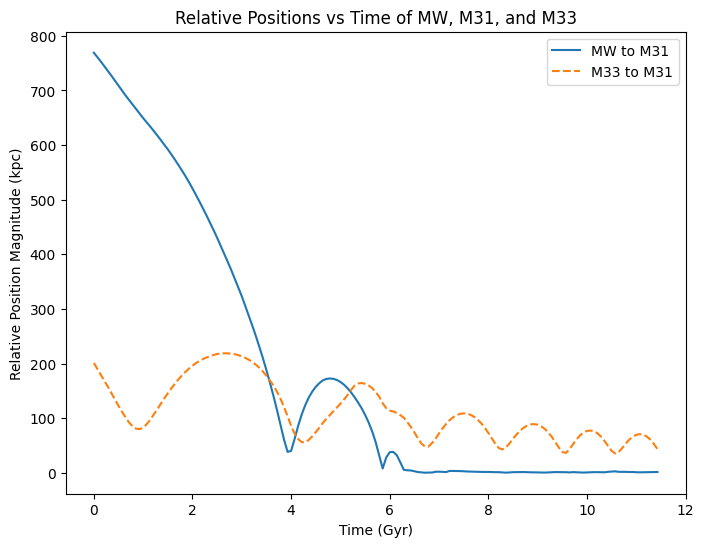

In [121]:
# Plot the Orbit of the galaxies 
#################################

plt.figure(figsize=(8, 6))

# Plot relative positions of MW to M31 and M33 to M31
plt.plot(t_MW, r_MW_M31, label="MW to M31")
plt.plot(t_M33, r_M33_M31, label="M33 to M31", linestyle="dashed")

# Labels and title
plt.xlabel('Time (Gyr)')
plt.ylabel('Relative Position Magnitude (kpc)')
plt.title('Relative Positions vs Time of MW, M31, and M33')

# Add a legend to differentiate the curves
plt.legend()

# Show the plot
plt.show()


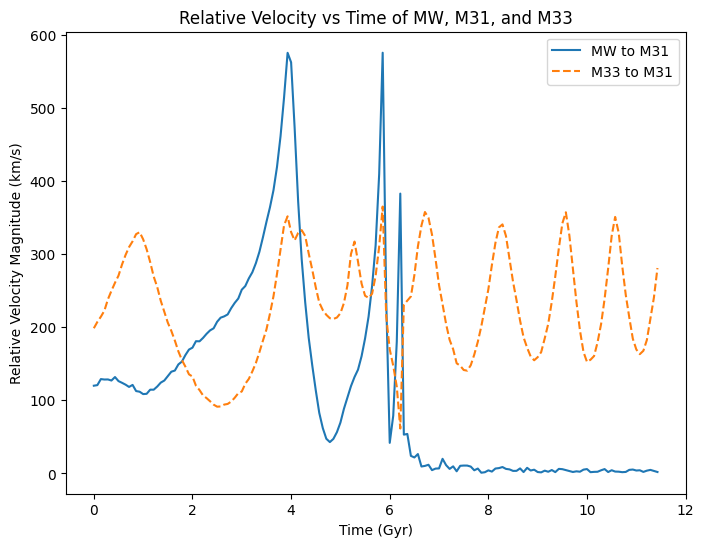

In [118]:
# Plot the orbital velocities of the galaxies 
#################################

plt.figure(figsize=(8, 6))

# Plot relative velocities of MW to M31 and M33 to M31
plt.plot(t_MW, v_MW_M31, label="MW to M31")
plt.plot(t_M33, v_M33_M31, label="M33 to M31", linestyle="dashed")

# Labels and title
plt.xlabel('Time (Gyr)')
plt.ylabel('Relative Velocity Magnitude (km/s)')
plt.title('Relative Velocity vs Time of MW, M31, and M33')

# Add a legend to differentiate the curves
plt.legend()

# Show the plot
plt.show()


## 4. Questions (Codes for answers are below this cell)

### 1. How many close encounters will the MW and M31 experience in the future?
- According to my method of taking local minima of MW and M31 separation, there are in total 14 close encounters between these 2 in the future.
- Between those 14 encounters, 13 of them has the separation below 10 kpc (a lot of extremely close encounters!)
- However, I don't know if my code is incorrect since using my own eyes, I only picked up 3 local minima within the Relative Position vs Time graph above. Therefore I could say in case my code is incorrect that they only have major encounters 3 times. 

### 2. How is the time evolution of the separation and relative velocity related?
- According to my observation, when separation gets smaller, velocity gets bigger. 
- This makes sense since the more gravitational impacted an object got, the faster it moves. 

### 3. When do M31 and MW merge? What happens to M33’s orbit when they merge?
- Using my method of picking the smallest separation value in the r_MW_M31 array, I determine the merging time is approximately 6.71 Gyr.
- However, this method could be wrong depending on how do you define "merge". Is it when the 2 galaxies start touching? Or is it when they completely mix into one another. I pick the latter for simplicity. 
- According to the Relative Position vs Time and Relative Velocity vs Time above, I observe that when M31 and MW merge, M33 has a major dip in its velocity, the lowest on the entire graph. However, its velocity picked up as it gets closer and closer to M31 after the merger happened.
- This makes me believe that the orbit of M33 decays for a little bit when MW and M31 merged, then it also got dragged inside the merged galaxies as the remnants of M33 got too close (and also the merged galaxies got bigger, hence more gravitational pull). 

### 4. BONUS: What is the decay rate of M33’s orbit after 6 Gyr? If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of 75 kpc?
- I am not sure if the code is correct but according to my result, the decay rate of M33's orbit after 6 Gyr (so after the merger) is about 10.231 kpc/Gyr. 
- They will merge with the remnant in 13.33 Gyr if the decay rate is constant and they are at the distance of 75 kpc. 


In [ ]:
# Q1: Check what are the closest positions MW and M31 to each other over time
# Find local minima for r_MW_M31

from scipy.signal import argrelextrema  # Used to find local extrema in data

def find_local_minima(time, distance):
    """ 
    Identify times when MW and M31 are at their closest approach (local minima in the relative position).
    
    Parameters: 
        time: array
            Time values corresponding to the galaxy separation measurements.
        distance: array
            Separation (kpc) between MW and M31 over time.
    
    Returns:
        tuple: Arrays containing times and distances at which MW and M31 experience close encounters.
    """
    
    minima_indices = argrelextrema(distance, np.less)[0]  # Find local minima in distance
    return time[minima_indices], distance[minima_indices]

# Find and count the number of close encounters
encounter_times, encounter_distances = find_local_minima(t_MW, r_MW_M31)
num_encounters = len(encounter_times)

# Print the number of close encounters and years of those encounters
print(f"Number of close encounters: {num_encounters}")
print(f"Close encounter times (Gyr): {encounter_times}")

Number of close encounters: 14
Close encounter times (Gyr): [ 3.929  5.857  6.714  6.857  7.143  7.929  8.357  8.857  9.143  9.643
  9.929 10.357 10.857 11.071]


In [ ]:
# Q1: I want to filter even closer distance within those minima (below 10 kpc)
extreme_close_encounters = encounter_distances < 10 # kpc
close_times = encounter_times[extreme_close_encounters] 
close_separations = encounter_distances[extreme_close_encounters]

# Print filtered results 
print(f"Number of close encounters (below 10 kpc): {len(close_times)}")
print(f"Close encounter times (Gyr) below 10 kpc: {close_times}")

Number of close encounters (below 10 kpc): 13
Close encounter times (Gyr) below 10 kpc: [ 5.857  6.714  6.857  7.143  7.929  8.357  8.857  9.143  9.643  9.929
 10.357 10.857 11.071]


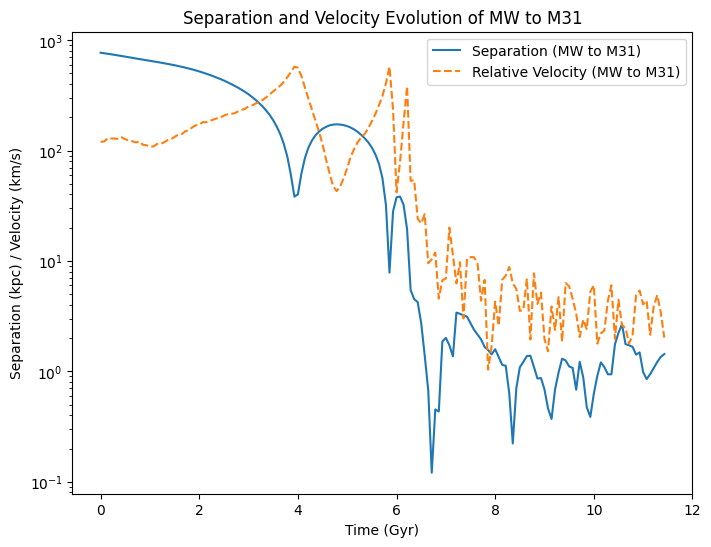

In [123]:
# Q2: Plot separation and velocity over time to see how they are related to each other

plt.figure(figsize=(8, 6))
plt.plot(t_MW, r_MW_M31, label="Separation (MW to M31)")
plt.plot(t_MW, v_MW_M31, label="Relative Velocity (MW to M31)", linestyle="dashed")
plt.xlabel('Time (Gyr)')
plt.ylabel('Separation (kpc) / Velocity (km/s)')
plt.yscale('log')  # Log scale for better observation
plt.title('Separation and Velocity Evolution of MW to M31')
plt.legend()
plt.show()

In [127]:
# Q3: To find the merger time, find the closest separation between the 2 galaxies
merger_time = t_MW[np.argmin(r_MW_M31)]
print(f"MW and M31 merge at approximately {merger_time:.2f} Gyr.")

MW and M31 merge at approximately 6.71 Gyr.


In [129]:
# Q4: 

# Estimating the decay rate of M33's orbit after 6 Gyr
time_after_6Gyr = t_M33[t_M33 >= 6]  # Times after 6 Gyr
separation_after_6Gyr = r_M33_M31[t_M33 >= 6]  # Separation after 6 Gyr

# Find apocenters (local maxima in separation)
max_times, max_separations = find_local_minima(time_after_6Gyr, -separation_after_6Gyr) # Flip data to find maxima
decay_rates = np.diff(max_separations) / np.diff(max_times)  # Approximate decay per period

# Estimate merger time (assuming constant decay)
initial_distance = 75  # kpc
average_decay = np.mean(decay_rates)
estimated_merger_time = initial_distance / abs(average_decay) + 6  # Adding 6 Gyr because decay is estimated post 6 Gyr

# Print results
print(f"Estimated decay rate of M33's orbit after 6 Gyr: {average_decay:.3f} kpc/Gyr.")
print(f"Estimated time for M33 to merge with MW+M31 remnant: {estimated_merger_time:.2f} Gyr.")

Estimated decay rate of M33's orbit after 6 Gyr: 10.231 kpc/Gyr.
Estimated time for M33 to merge with MW+M31 remnant: 13.33 Gyr.
